<a class="anchor" id="0"></a>
# **Classifier model in Python**

## **Initial Set-Up**

In [2]:
#import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import numpy as np # matrice manipulator

In [3]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")


## **Read dataset**

In [4]:
# load and preview data
data= pd.read_excel('Base_simplifiée.xlsx')
data.head()

,Hopital consulté,Sexe,Profession,Ethnie,Age,Classe d'age,Revenu mensuel moyen,Antécédent familial de cancer,Organe primaire de la maladie cancéreuse,Présence de métastases,Durée du traitement,consommation active de substances psychostimulantes non prescrites médicalement,Score total OSLO,Classification OSLO,Score de dépistage,Résultat dépistage
0,CAE,Masculin,Retraité,Bamiléké,61,60-70,100k-300k,Non,Vessie,Non,inf à 1 an,Non,10,9-11,9,Positif (sup à 8)
1,CAE,Féminin,Fonctionnaire (privé et public),Bamiléké,45,40-50,inf à 100K,Oui,Utérus,Non,inf à 1 an,Non,6,3-8,7,Négatif (inf ou égale à 8)
2,COCB,Féminin,Ménagère,Douala et assimilés,47,40-50,inf à 100K,Non,Ovaire,Non,1 à 2 ans,Non,10,9-11,6,Négatif (inf ou égale à 8)
3,COCB,Féminin,Ménagère,Bamiléké,44,40-50,inf à 100K,Non,Sein,Non,inf à 1 an,Non,12,12-14,3,Négatif (inf ou égale à 8)
4,COCB,Féminin,Commerçant,Douala et assimilés,46,40-50,100k-300k,Non,Utérus,Oui,inf à 1 an,Non,13,12-14,12,Positif (sup à 8)


In [5]:
#Nom des colonnes
data.columns

Index(['Hopital consulté', 'Sexe', 'Profession', 'Ethnie', 'Age',
       'Classe d'age', 'Revenu mensuel moyen', 'Antécédent familial de cancer',
       'Organe primaire de la maladie cancéreuse', 'Présence de métastases',
       'Durée du traitement',
       'consommation active de substances psychostimulantes non prescrites médicalement',
       'Score total OSLO ', 'Classification OSLO', 'Score de dépistage',
       'Résultat dépistage'],
      dtype='object')

In [6]:
#ignore numerics variables
df_no_numeric=data[
                    ['Hopital consulté','Sexe', 'Profession', 'Ethnie',"Classe d'age",
                       'Revenu mensuel moyen', 'Antécédent familial de cancer',
                       'Organe primaire de la maladie cancéreuse', 'Présence de métastases',
                       'Durée du traitement','consommation active de substances psychostimulantes non prescrites médicalement',
                       'Classification OSLO','Résultat dépistage'
                    ]
                ]

In [7]:
df_no_numeric.shape

(1720, 13)

In [32]:
#Encoder les variables qualitatives
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df=pd.DataFrame()

In [33]:
for column in df_no_numeric.columns:
    df[column] = encoder.fit_transform(df_no_numeric[column])

In [10]:
df.head()

,Hopital consulté,Sexe,Profession,Ethnie,Classe d'age,Revenu mensuel moyen,Antécédent familial de cancer,Organe primaire de la maladie cancéreuse,Présence de métastases,Durée du traitement,consommation active de substances psychostimulantes non prescrites médicalement,Classification OSLO,Résultat dépistage
0,0,1,4,0,4,0,0,16,1,5,0,2,1
1,0,0,2,0,2,3,1,15,1,5,0,1,0
2,1,0,3,4,2,3,0,8,1,0,0,2,0
3,1,0,3,0,2,3,0,14,1,5,0,0,0
4,1,0,0,4,2,0,0,15,2,5,0,0,1


In [40]:
#df.to_excel('TMC_encode.xlsx')

## **View summary of dataset**

In [11]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720 entries, 0 to 1719
Data columns (total 13 columns):
 #   Column                                                                           Non-Null Count  Dtype
---  ------                                                                           --------------  -----
 0   Hopital consulté                                                                 1720 non-null   int64
 1   Sexe                                                                             1720 non-null   int64
 2   Profession                                                                       1720 non-null   int64
 3   Ethnie                                                                           1720 non-null   int64
 4   Classe d'age                                                                     1720 non-null   int64
 5   Revenu mensuel moyen                                                             1720 non-null   int64
 6   Antécédent familial de c

- We can see that there are 13 columns in the dataset and there are no missing values.

In [12]:
df['Résultat dépistage'].value_counts(),data['Résultat dépistage'].value_counts()

(Résultat dépistage
 1    993
 0    727
 Name: count, dtype: int64,
 Résultat dépistage
 Positif (sup à 8)             993
 Négatif (inf ou égale à 8)    727
 Name: count, dtype: int64)

## **Declare feature vector and target variable**

In [35]:
# Remplacer les espaces dans les noms des colonnes
#da*f.columns = df.columns.str.replace(' ', '_')

In [36]:
y=df['Résultat_dépistage']
X=df.drop(['Résultat_dépistage'],axis=1)

## **Split dataset into training and test set**

In [37]:
# split the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## **Model Development and Training**

In [25]:
#import the models
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,ExtraTreesClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.svm import  LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.dummy import DummyClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [26]:
#Declare models
clf = lgb.LGBMClassifier()
rfc=RandomForestClassifier()
gbc=GradientBoostingClassifier()
etc=ExtraTreesClassifier()
adabc=AdaBoostClassifier()
logit=LogisticRegression()

model_list=['clf','rfc','gbc','etc','adabc','logit']
model_list = [eval(model) for model in model_list]

In [38]:
for model in model_list:
    model.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 704, number of negative: 500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 64
[LightGBM] [Info] Number of data points in the train set: 1204, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.584718 -> initscore=0.342170
[LightGBM] [Info] Start training from score 0.342170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

## **Model Prediction**

In [17]:
# predict the results
y_pred=clf.predict(X_test)

NotFittedError: Estimator not fitted, call fit before exploiting the model.

## **View Accuracy**

In [ ]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuclf.fit(X_train,y_train)racy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9612


- Here, `y_test` are the true class labels and `y_pred` are the predicted class labels in the test-set.

## **Compare train and test set accuracy**

- Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [ ]:
y_pred_train = clf.predict(X_train)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9884


## **Check for Overfitting**

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.9884
Test set score: 0.9612


- The training and test set accuracy are quite comparable. So, we cannot say there is overfitting.

## **Confusion-matrix**

In [ ]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[214  13]
 [  7 282]]

True Positives(TP) =  214

True Negatives(TN) =  282

False Positives(FP) =  13

False Negatives(FN) =  7


<Axes: >

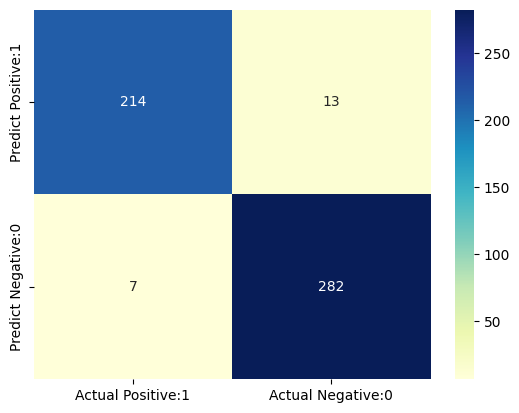

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# **Classification Metrices** 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       227
           1       0.96      0.98      0.97       289

    accuracy                           0.96       516
   macro avg       0.96      0.96      0.96       516
weighted avg       0.96      0.96      0.96       516

